<img src="img/CSK_banner.PNG" alt="banner">
# A (Brief) Introduction to Data Science
**CSK 2020**

Welcome to the wild world of data science! This is a notebook designed for UC Berkeley's CS Kickstart program, specifically . Feel free to read through this lab and interact with the content.

## Table of Contents
- The Jupyter Notebook
- "The Data Science Life Cycle"
- Data Analysis 
- Hypothesis and Predictions
- Next Steps


# 0: The Jupyter Notebook
[Jupyter Notebook](https://jupyter.org/) is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. The file that we are on now is a jupyter notebook, and it's used fairly extensively in the data science industry. It consists of a series of cells that you can run in real time.

Here's a quick rundown on how to use this notebook.

## 0.1 Cells
This notebook is made out of a series of cells. A cell is a multiline text input field, and its contents can be executed by using Shift-Enter, or by clicking either the “Play” button (▶|) in the toolbar, or Cell, Run in the menu bar. 

There are three types of cells:
- code cells
- markdown cells
- raw cells

You don't need to worry about the last type of cell; we'll be dealing with the first two today.
### 0.1.1 Code Cells
Code cells are cells where we can write and run code in python. Here's an example of a code cell, see if you can run it by pressing Shift-Enter (or Cell->Run in the menu)


In [1]:
print('hello world')

hello world


If you ran the cell correctly, the notebook should output the words "hello world". Pretty neat huh?

### 0.1.1 Markdown Cells
Markdown cells are cells like this one where we can write text and have it display in the notebook. In this notebook the only time you'll have to edit these types of cells will be in some free response answers like the one below. Edit the following cell and run it to see the text!

**Question 0.1** What's your name and favorite food?

*YOUR ANSWER HERE*

# 1."The Data Science Life Cycle"

The first thing we can ask ourselves about this question is "what exactly *is* data science in the first place?"

The [data8 textbook](https://www.inferentialthinking.com/chapters/01/1/intro.html) says the following about data science.
> Data Science is about drawing useful conclusions from large and diverse data sets through exploration, prediction, and inference. Exploration involves identifying patterns in information. Prediction involves using information we know to make informed guesses about values we wish we knew. Inference involves quantifying our degree of certainty: will the patterns that we found in our data also appear in new observations?

Hopefully we can continue to develop this definition during today's lab, starting off with a concept called the "data science life cycle."

## 1.1 The Life Cycle, deconstructed
The steps to the cycle are as follows: 
1. Formulating a question or problem
2. Acquiring and cleaning data
3. Conducting exploratory data analysis
4. Using prediction and inference to draw conclusions


In [2]:
## cleaning data real quick 
from datascience import *
import pandas as pd 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

by_maj = Table.read_table('data/by_major.csv')
#bm = pd.read_csv('data/by_major.csv')
by_min = Table.read_table('data/by_minors.csv')
gender_ethnicity = Table.read_table('data/level_gender_ethnicity.csv')
STEM_all = Table.read_table('data/STEM_collegewide.csv')
STEM_major = Table.read_table('data/STEM_majors.csv')
STEM_pipeline = Table.read_table('data/STEM_pipeline.csv')
student_maj = Table.read_table('data/student_majors.csv')

In [3]:
stem_gender = by_maj.select(['STEM Flag', 'Gender'])
stem_gender.group('STEM Flag')

STEM Flag,count
0,8826
1,9199


In [4]:
t = stem_gender.where('STEM Flag', 0).group('Gender')

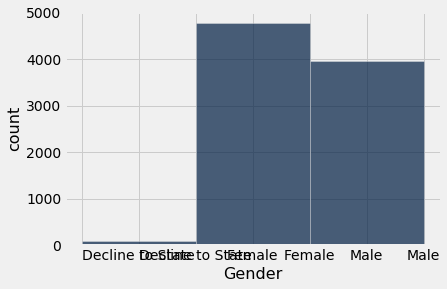

In [5]:
t.bar('Gender', 'count')

In [6]:
gender_ethnicity

Academic Yr,Degree Level Desc,Person Gender Desc,Ucb Level1 Ethnic Rollup Desc,Headcount
2011-12,Bachelor,Female,Asian/Pacific Islander,1524
2011-12,Bachelor,Female,International,254
2011-12,Bachelor,Female,Underrepresented Minority,656
2011-12,Bachelor,Female,White/Other,1452
2011-12,Bachelor,Male,Asian/Pacific Islander,1310
2011-12,Bachelor,Male,International,280
2011-12,Bachelor,Male,Underrepresented Minority,447
2011-12,Bachelor,Male,White/Other,1390
2011-12,Doctoral,Female,Asian/Pacific Islander,61
2011-12,Doctoral,Female,International,62


In [7]:
STEM_all

Year,Institution,Type,Gender,CIP Fld,Degree Count
2016-17,Harvard,Private,Female,Archeology,5
2016-17,Harvard,Private,Female,Behavioral Sciences,11
2016-17,Harvard,Private,Female,Biological and Biomedical Sciences,164
2016-17,Harvard,Private,Female,Cognitive Psychology and Psycholinguistics,0
2016-17,Harvard,Private,Female,Computer Science,65
2016-17,Harvard,Private,Female,Engineering,26
2016-17,Harvard,Private,Female,Environmental Studies,14
2016-17,Harvard,Private,Female,Experimental Psychology,87
2016-17,Harvard,Private,Female,Mathematics and Statistics,78
2016-17,Harvard,Private,Female,Natural Sciences,10


In [8]:
STEM_major

Semester,STEM Flg,CIP Field,Gender,Ethnicity,Headcount
Spring 2020,Not STEM,Not STEM,All Other Students,Asian/Pacific Islander,547
Spring 2020,Not STEM,Not STEM,All Other Students,International,200
Spring 2020,Not STEM,Not STEM,All Other Students,Underrepresented Minority,707
Spring 2020,Not STEM,Not STEM,All Other Students,White/Other,827
Spring 2020,Not STEM,Not STEM,Female,Asian/Pacific Islander,"1,201"
Spring 2020,Not STEM,Not STEM,Female,International,296
Spring 2020,Not STEM,Not STEM,Female,Underrepresented Minority,"1,419"
Spring 2020,Not STEM,Not STEM,Female,White/Other,"1,386"
Spring 2020,STEM,Biological And Biomedical Sciences,All Other Students,Asian/Pacific Islander,343
Spring 2020,STEM,Biological And Biomedical Sciences,All Other Students,International,37


In [9]:
STEM_pipeline

Timepoint,STEM Flg,Applicant Type,Gender,Ethnicity,Headcount
Admitted,Not STEM,Freshman Entrant,All Other Students,Asian/Pacific Islander,"7,391"
Admitted,Not STEM,Freshman Entrant,All Other Students,International,"2,207"
Admitted,Not STEM,Freshman Entrant,All Other Students,Underrepresented Minority,"4,433"
Admitted,Not STEM,Freshman Entrant,All Other Students,White/Other,"9,147"
Admitted,Not STEM,Freshman Entrant,Female,Asian/Pacific Islander,"12,700"
Admitted,Not STEM,Freshman Entrant,Female,International,"3,333"
Admitted,Not STEM,Freshman Entrant,Female,Underrepresented Minority,"8,718"
Admitted,Not STEM,Freshman Entrant,Female,White/Other,"12,933"
Admitted,Not STEM,Transfer Entrant,All Other Students,Asian/Pacific Islander,"1,961"
Admitted,Not STEM,Transfer Entrant,All Other Students,International,"1,090"


In [10]:
student_maj

Academic Yr,Ungrad Grad Cd,Term/Year,Term Period,College/School,Division,Department,Major,Gender,Ethnicity,Headcount,Prorated Headcount,Number of Records,Entry Status Desc,MajorShort,STEM Flag,Residency Status Desc,Residency Fee Cd
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,10,10,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Asian/Pacific Islander,7,7,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,International,18,18,1,Graduate,Chem Eng,STEM,International,International
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,3,3,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,Underrepresented Minority,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,White/Other,22,22,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Female,White/Other,5,5,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,16,16,1,Graduate,Chem Eng,STEM,CA Resident,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,1,1,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,CA Resident
2018-19,Graduate,2018 Fall,Fall,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,Chemical Engineering,Male,Asian/Pacific Islander,6,6,1,Graduate,Chem Eng,STEM,Out-of-State Domestic,Out-of-State Domestic


# 2. Data Analysis

In [11]:
def stem(flag):
    if flag == "STEM":
        return 1
    return 0

def num(string):
    return int(string.replace(",", ""))

new_col1 = STEM_pipeline.apply(stem, "STEM Flg")
new_col2 = STEM_pipeline.apply(num, "Headcount")
new_table = STEM_pipeline.append_column("STEM?", new_col1).append_column("Headcount", new_col2)

In [12]:
gen_hc = new_table.select(["Gender", "Headcount"]).group("Gender", sum)
gen_hc

Gender,Headcount sum
All Other Students,634167
Female,633632


Gender,Num in STEM
All Other Students,401110
Female,304723


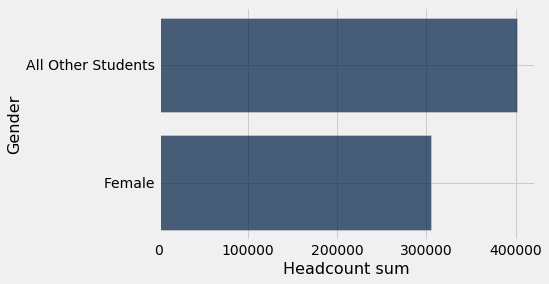

In [16]:
gen_stem = new_table.where("STEM Flg", "STEM").select(["Gender", "Headcount"])
gen_grouped = gen_stem.group("Gender", sum)
gen_grouped.barh("Gender")
gen_grouped.relabel("Headcount sum", "Num in STEM")

In [17]:
# gen_not_stem = new_table.where("STEM Flg", "Not STEM").select(["Gender", "Headcount"])
# gen_not_grouped = gen_not_stem.group("Gender", sum)
# gen_not_grouped.barh("Gender")
# gen_not_grouped

In [19]:
pct_stem = gen_grouped.column("Num in STEM")/gen_hc.column("Headcount sum")
gen_hc.append_column("% STEM", pct_stem)

Gender,Headcount sum,% STEM
All Other Students,634167,0.632499
Female,633632,0.480915


# 3. Hypothesis and Prediction

# 4. Next Steps

<strong><em>Data Science @ Berkeley<em><strong>

There are a ton of ways to get involved with different data science opportunities at Berkeley!

• Clubs - Data Science Society at Berkeley, Opportunity Through Data, Big Data at Berkeley, Data Bears, Launchpad...you can find out more about different data science-focused student organizations on [Callink](https://callink.berkeley.edu/organizations) or Facebook!<br>
• Course staff - You can help teach the data science classes you've completed! [Data 8](http://data8.org/), the intro to data science class, is always in need of course staff because it's such a massive course. Lab assisting/tutoring/TAing is an awesome way to keep engaging with the material and get some really valuable experience teaching and helping students out. Plus, depending on what role you're hired for on course staff, you can get paid!<br>
• URAP - Cal runs the [Undergraduate Research Apprentice Program](https://urap.berkeley.edu/) every semester, with both new and continuing projects. It's a great opportunity to get hands-on experience working with faculty and/or grad students and learn how data science can be applied to a ton of different academic fields!<br>
• Division of Data Science - [The Division](https://data.berkeley.edu/) offers all sorts of helpful resources for students interested in data science, like peer advising where you can talk to other undergraduates for advice, conceptual help, and planning out your data science courses.<br>
• Data Scholars - [Data Scholars](https://data.berkeley.edu/academics/resources/data-scholars) is a program run by the Division that's dedicated to providing mentorship, prep, interview tips, resources, and so much more for minorities (like women!) in data science to introduce and prepare them to intern or work in industry.<br>
• D-Lab - [The D-Lab](https://dlab.berkeley.edu/) runs technical workshops almost every weekday about a wide variety of data science + computer science concepts and applications, from programming language introduction crash courses to natural language processing to neural networks. Check out their [calendar](https://dlab.berkeley.edu/calendar-node-field-date) to see what kinds of workshops they're offering soon!<br>

---

Developed by Catherine Gee, <>. 

Materials and content adapted from [*Computational and Inferential Thinking*](https://www.inferentialthinking.com/chapters/intro.html) by Ani Adihikari and John Denero; [*Principles and Techniques of Data Science*](https://www.textbook.ds100.org/intro.html) by Sam Lau, Joey Gonzalez, and Deb Nolan. 